### **Assignment #1**

In this assignment you will learn about linear regression. You have to predict the fuel
consumption of different cars based on a set of car features.
Write the code to fit the multiple linear regression in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Download the dataset [Auto MPG](http://archive.ics.uci.edu/dataset/9/auto+mpg) and remove the attribute cylinders and carname. Pay attention to potential categorical attributes and missing values.

In [2]:
header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
          'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=header)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:

data['intercept'] = 1
data = data[data['horsepower'] != '?']
data.loc[:, ['origin_1', 'origin_2']] = [[bin(el + 4)[3], bin(el + 4)[4]] for el in data.loc[:, 'origin']]
data = data[['intercept', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'mpg', 'origin_1', 'origin_2']]
data = data.astype('float64')
data.head()

,intercept,displacement,horsepower,weight,acceleration,model year,mpg,origin_1,origin_2
0,1.0,307.0,130.0,3504.0,12.0,70.0,18.0,0.0,1.0
1,1.0,350.0,165.0,3693.0,11.5,70.0,15.0,0.0,1.0
2,1.0,318.0,150.0,3436.0,11.0,70.0,18.0,0.0,1.0
3,1.0,304.0,150.0,3433.0,12.0,70.0,16.0,0.0,1.0
4,1.0,302.0,140.0,3449.0,10.5,70.0,17.0,0.0,1.0


Split your dataset on train and test data.


In [4]:
# shuffle
data = data.sample(frac=1).reset_index(drop=True)
# seperate X, Y
target = 'mpg'
Y = data[target]
X = data.drop(data[[target]], axis=1)

# seperate train, test set
n = int(len(X)*0.7)
x_train = X[:n].values
x_test = X[n:].values

y_train = Y[:n]
y_test = Y[n:]

Test your linear regression on the Auto dataset and compare it with the liear regression implemented in SciKit-learn.


In [5]:
beta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
pred = x_test @ beta

mse = mean_squared_error(y_test, pred) # np.sum((predicted - y_test)**2)/n
r2 = r2_score(y_test, pred)
print(f"MSE: {mse}, R2: {r2}")

MSE: 16.549331838276125, R2: 0.7669377911996634


In [6]:
lin_reg = LinearRegression().fit(x_train, y_train)
pred2 = lin_reg.predict(x_test)

mse = mean_squared_error(y_test, pred2) # np.sum((predicted - y_test)**2)/n
r2 = r2_score(y_test, pred)
print(f"MSE: {mse}, R2: {r2}")

MSE: 16.549331838268103, R2: 0.7669377911996634


Diagnose your linear regression with the diagnostic plots.

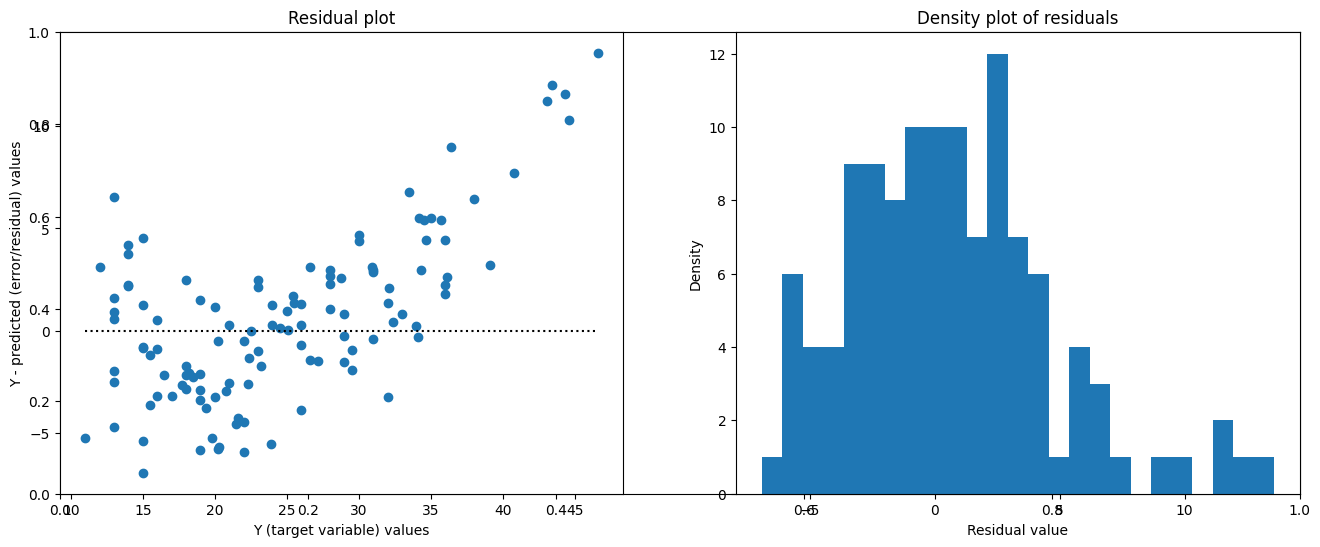

Distribution center: 0.2790718668666088


In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test-pred)
plt.plot((min(y_test), max(y_test)), (0, 0), c='black', linestyle='dotted')
plt.xlabel("Y (target variable) values")
plt.ylabel("Y - predicted (error/residual) values")
plt.title("Residual plot")

plt.subplot(1, 2, 2)
plt.hist(y_test-pred, bins=25)
plt.ylabel("Density")
plt.xlabel("Residual value")
plt.title("Density plot of residuals")
plt.show()
np.percentile(y_test-pred, 50)

ax.set_xticks([])
ax.set_yticks([])

plt.show()
print(f"Distribution center: {np.percentile(y_test-pred, 50)}")

Is there something you can improve like transform your target variable or remove
some attributes/instances? Try different things and refit the linear regression.

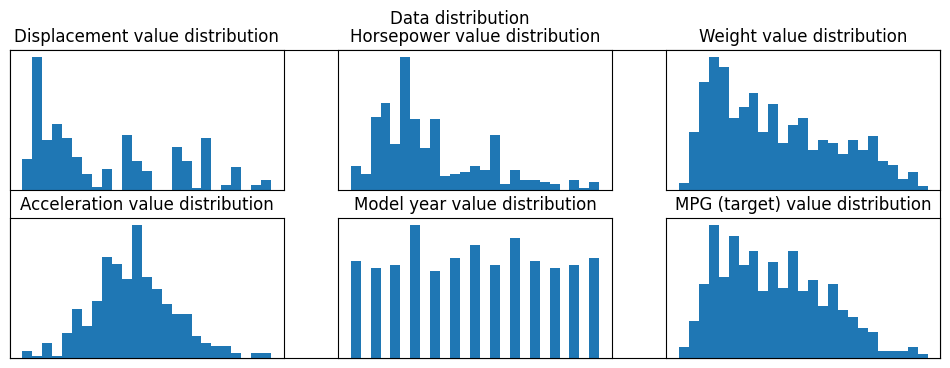

In [8]:
bs =25
fig, ax = plt.subplots(figsize=(12, 4))

plt.subplot(2, 3, 1)
plt.hist(X['displacement'], bins=bs)
plt.title("Displacement value distribution")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 2)
plt.hist(X['horsepower'], bins=bs)
plt.title("Horsepower value distribution")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 3)
plt.hist(X['weight'], bins=bs)
plt.title("Weight value distribution")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 4)
plt.hist(X['acceleration'], bins=bs)
plt.title("Acceleration value distribution")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 5)
plt.hist(X['model year'], bins=bs)
plt.title("Model year value distribution")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 6)
plt.hist(Y, bins=bs)
plt.title("MPG (target) value distribution")
plt.xticks([])
plt.yticks([])

fig.suptitle("Data distribution")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

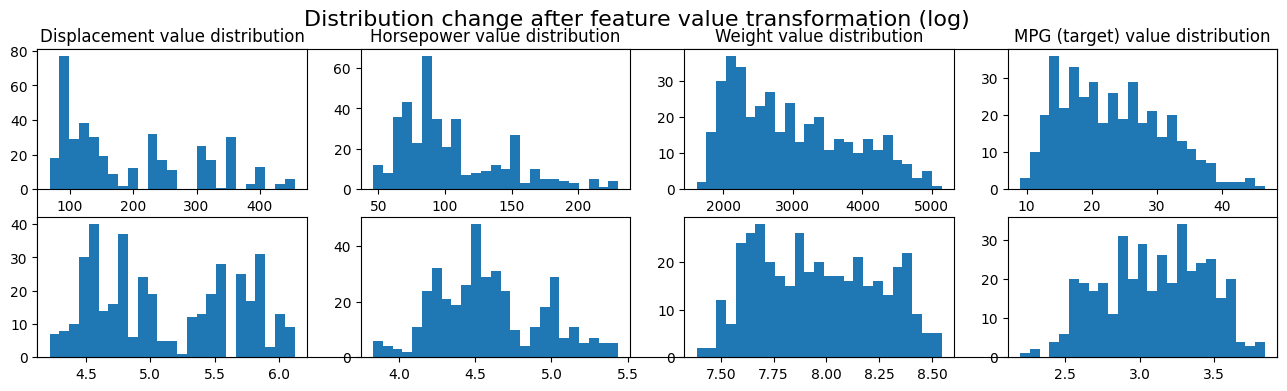

In [9]:
bs =25
fig, ax = plt.subplots(figsize=(16, 4))

plt.subplot(2, 4, 1)
plt.hist(X['displacement'], bins=bs) # displacement
plt.title("Displacement value distribution")

plt.subplot(2, 4, 5)
plt.hist(np.log(X['displacement']), bins=bs)

plt.subplot(2, 4, 2)
plt.hist(X['horsepower'], bins=bs)
plt.title("Horsepower value distribution")

plt.subplot(2, 4, 6)
plt.hist(np.log(X['horsepower']), bins=bs)

plt.subplot(2, 4, 3)
plt.hist(X['weight'], bins=bs)
plt.title("Weight value distribution")

plt.subplot(2, 4, 7)
plt.hist(np.log(X['weight']), bins=bs)

plt.subplot(2, 4, 4)
plt.hist(Y, bins=bs) # displacement
plt.title("MPG (target) value distribution")

plt.subplot(2, 4, 8)
plt.hist(np.log(Y), bins=bs)

ax.set_xticks([])
ax.set_yticks([])
fig.suptitle("Distribution change after feature value transformation (log)", fontsize=16)

plt.show()

In [10]:
X[['displacement', 'horsepower', 'weight']] = np.log(X[['displacement', 'horsepower', 'weight']])
Y = np.log(Y)

In [11]:
n = int(len(X)*0.7)
x_train = X[:n].values
x_test = X[n:].values

y_train = Y[:n]
y_test = Y[n:]

In [14]:
lr = LinearRegression().fit(x_train, y_train)
pred = lr.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f"MSE: {mse}, R2: {r2}")

MSE: 0.016347936137806003, R2: 0.8646328230916275


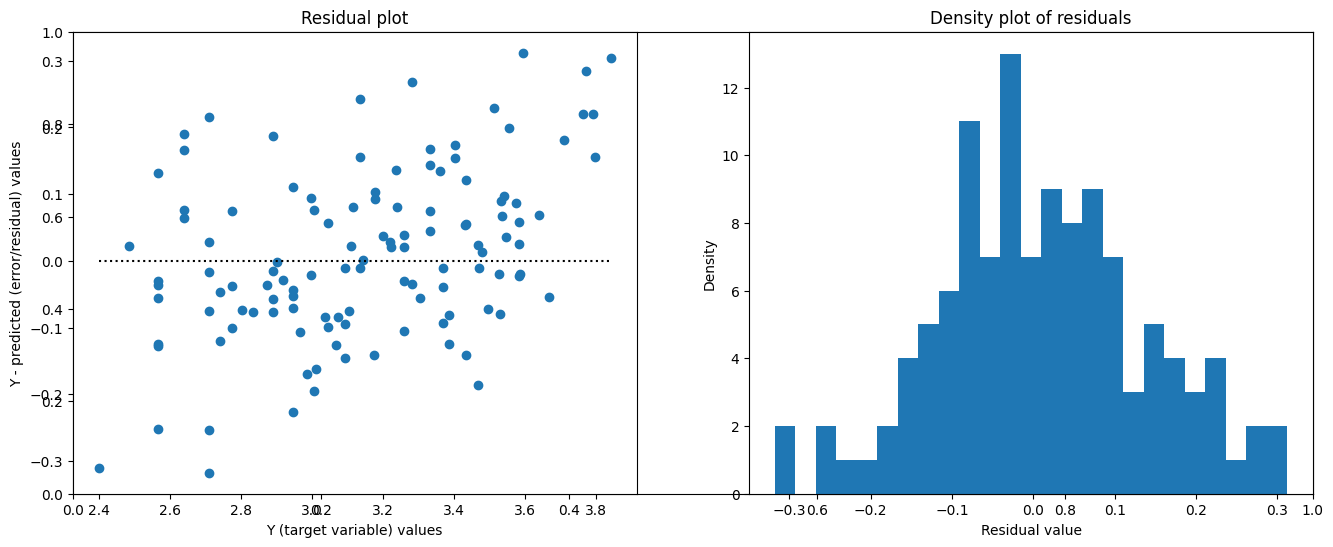

Distribution center: -0.006279040042264761


In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test-pred)
plt.plot((min(y_test), max(y_test)), (0, 0), c='black', linestyle='dotted')
plt.xlabel("Y (target variable) values")
plt.ylabel("Y - predicted (error/residual) values")
plt.title("Residual plot")

plt.subplot(1, 2, 2)
plt.hist(y_test-pred, bins=25)
plt.ylabel("Density")
plt.xlabel("Residual value")
plt.title("Density plot of residuals")
plt.show()
np.percentile(y_test-pred, 50)

ax.set_xticks([])
ax.set_yticks([])

plt.show()
print(f"Distribution center: {np.percentile(y_test-pred, 50)}")